### Downloading Libraries

In [3]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import Input, Attention, Flatten

from tensorflow.keras.models import Model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [5]:
# Supress warnings
import warnings
warnings.filterwarnings("ignore")

### Import the Dataset

In [7]:
# Import the dataset
train_data = pd.read_csv('mitbih_train.csv')
test_data = pd.read_csv('mitbih_test.csv')

In [8]:
# Number of samples
print(f"Number of samples in train data: {train_data.shape[0]}")
print(f"Number of samples in test data: {test_data.shape[0]}")

Number of samples in train data: 87553
Number of samples in test data: 21891


### Exploratory Data Analysis

In [10]:
# Snap of the train dataset
train_data.head()

,9.779411554336547852e-01,9.264705777168273926e-01,6.813725233078002930e-01,2.450980395078659058e-01,1.544117629528045654e-01,1.911764740943908691e-01,1.519607901573181152e-01,8.578431606292724609e-02,5.882352963089942932e-02,4.901960864663124084e-02,...,0.000000000000000000e+00.79,0.000000000000000000e+00.80,0.000000000000000000e+00.81,0.000000000000000000e+00.82,0.000000000000000000e+00.83,0.000000000000000000e+00.84,0.000000000000000000e+00.85,0.000000000000000000e+00.86,0.000000000000000000e+00.87,0.000000000000000000e+00.88
0,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Check for missing values
print(f"Missing values in training dataset: {train_data.isna().sum().sum()}")
print(f"Missing values in testing dataset: {test_data.isna().sum().sum()}")

Missing values in training dataset: 0
Missing values in testing dataset: 0


In [12]:
# Check for duplicate values
print(f"Duplicated values in training dataset: {train_data.duplicated().sum()}")
print(f"Duplicated values in testing dataset: {test_data.duplicated().sum()}")

Duplicated values in training dataset: 0
Duplicated values in testing dataset: 0


In [13]:
# Check all categories in training dataset
print(train_data.iloc[:, -1].value_counts())

0.000000000000000000e+00.88
0.0    72470
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: count, dtype: int64


In [14]:
# Check all categories in testing dataset
print(test_data.iloc[:, -1].value_counts())

0.000000000000000000e+00.65
0.0    18117
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: count, dtype: int64


In [15]:
# Check for unique values
test_classes = test_data.iloc[:, -1].unique()
train_classes = train_data.iloc[:, -1].unique()

In [16]:
# Encoding the heartbeat categories
labels = {
    0: "Normal",
    1: "Artial Premature",
    2: "Premature ventricular contraction",
    3: "Fusion of ventricular and normal",
    4: "Fusion of paced and normal"
}

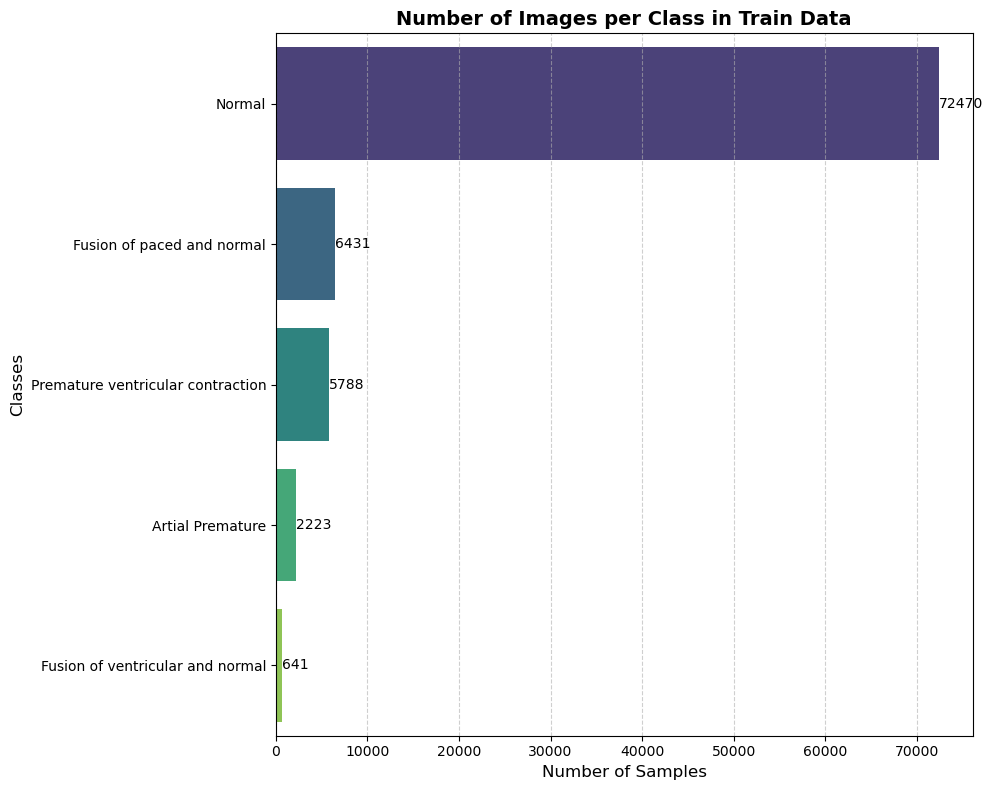

In [17]:

# Get class counts
train_counts = train_data.iloc[:, -1].value_counts().rename(labels)


colors = sns.color_palette("viridis", len(train_counts))

# Plot horizontal bar chart
plt.figure(figsize=(10, 8))
ax = sns.barplot(
    x=train_counts.values,
    y=train_counts.index,
    palette=colors,
    orient="h"
)


for i, p in enumerate(ax.patches):
    ax.annotate(
        f'{train_counts.values[i]}',
        (p.get_width() + 1, p.get_y() + p.get_height() / 2),
        ha='left', va='center',
        fontsize=10, color='black'
    )


plt.grid(axis='x', linestyle='--', alpha=0.6)


plt.title('Number of Images per Class in Train Data', fontsize=14, fontweight='bold')
plt.xlabel('Number of Samples', fontsize=12)
plt.ylabel('Classes', fontsize=12)

# Display the chart
plt.tight_layout()
plt.show()

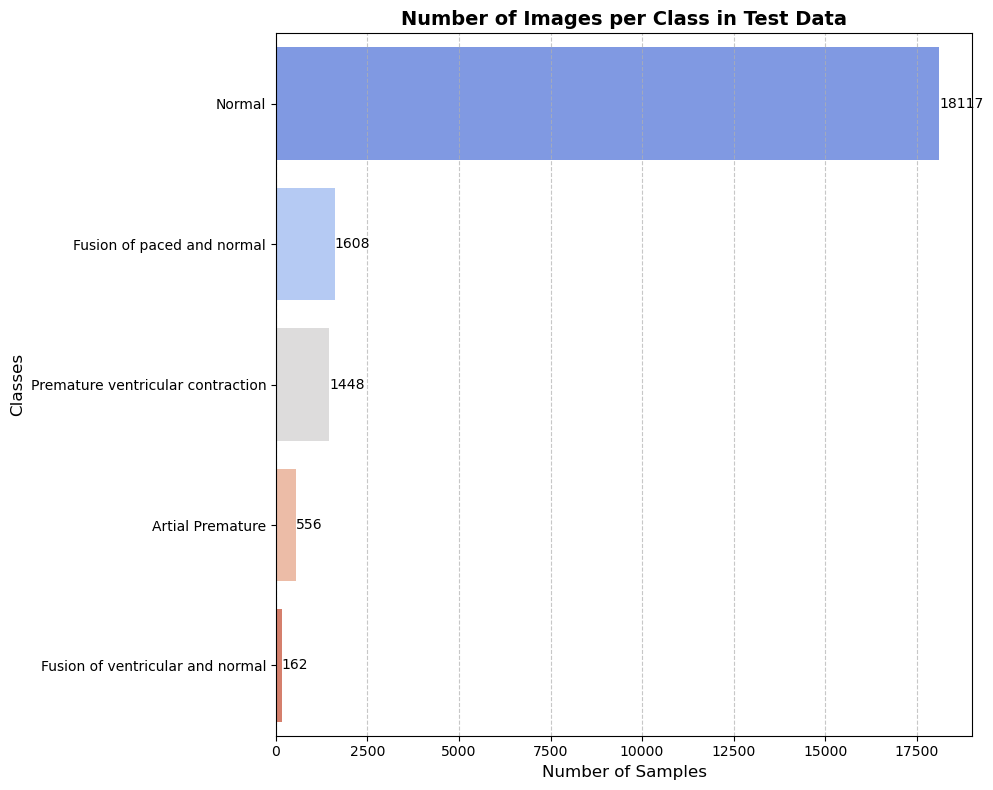

In [18]:
# Get class counts
test_counts = test_data.iloc[:, -1].value_counts().rename(labels)

colors = sns.color_palette("coolwarm", len(test_counts))

plt.figure(figsize=(10, 8))
ax = sns.barplot(
    x=test_counts.values,
    y=test_counts.index,
    palette=colors,
    orient='h'
)

for i, p in enumerate(ax.patches):
    ax.annotate(
        f'{test_counts.values[i]}',
        (p.get_width() + 1, p.get_y() + p.get_height() / 2),
        ha='left', va='center',
        fontsize=10, color='black'
    )

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.title('Number of Images per Class in Test Data', fontsize=14, fontweight='bold')
plt.xlabel('Number of Samples', fontsize=12)
plt.ylabel('Classes', fontsize=12)

plt.tight_layout()

# Show the plot
plt.show()

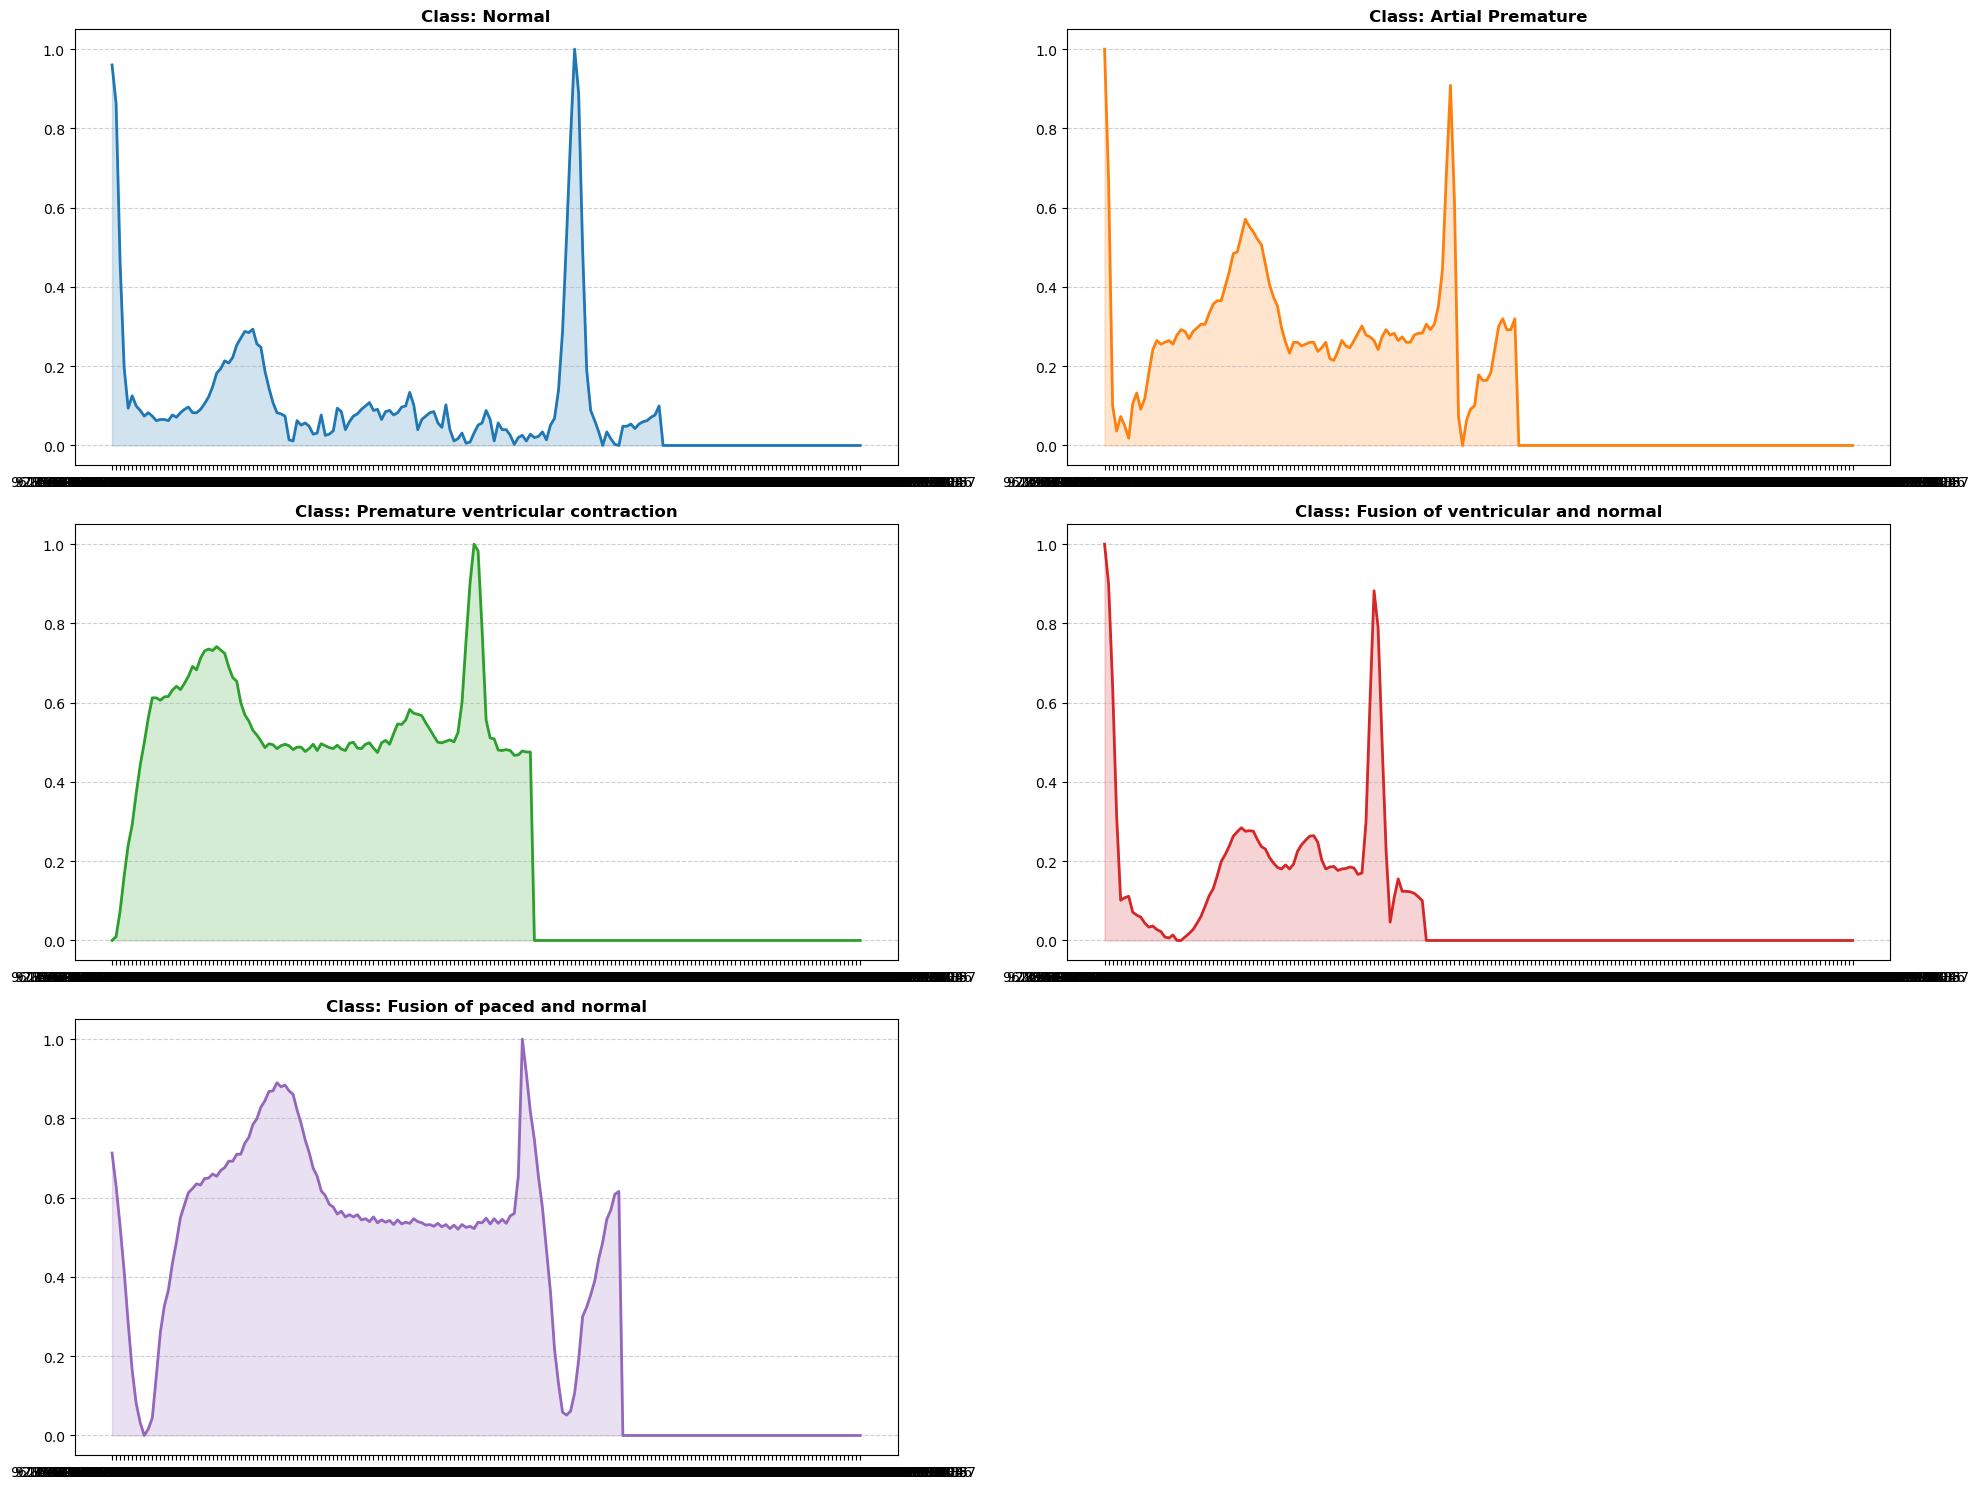

In [19]:

# Get unique classes
train_classes = train_data.iloc[:, -1].unique()
colors = sns.color_palette("tab10", len(train_classes))  # Distinct colors for each class

plt.figure(figsize=(20, 15))

for i, cls in enumerate(train_classes):
    plt.subplot((len(train_classes) + 1) // 2, 2, i + 1)
    class_data = train_data[train_data.iloc[:, -1] == cls].iloc[0, :-1]
    plt.plot(class_data, color=colors[i], lw=2)
    plt.fill_between(range(len(class_data)), class_data, alpha=0.2, color=colors[i])
    plt.title(f'Class: {list(labels.values())[i]}', fontsize=12, fontweight='bold')
    plt.grid(axis='y', linestyle='--', alpha=0.6)


plt.tight_layout()

# Show the plot
plt.show()


### Data Preprocessing

In [21]:
# Separate features and labels
X_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values

X_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values

# Scaling the data
Data_scaler_func = MinMaxScaler()
X_train_scaled = Data_scaler_func.fit_transform(X_train)
X_test_scaled = Data_scaler_func.transform(X_test)

# Define the number of samples for the validation set based on the test data size
n_test_samples = X_test_scaled.shape[0]

# Split the training data into new training and validation sets
X_val, X_test_new, y_val, y_test_new = train_test_split(X_test_scaled, y_test, test_size=0.5, random_state=42, stratify=y_test)

# Reshape the data for All models (samples, timesteps, features)
X_train_scaled = np.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
X_test_new = np.reshape(X_test_new, (X_test_new.shape[0], X_test_new.shape[1], 1))


print(f"New Training set size: {X_train_scaled.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test_new.shape[0]}")

New Training set size: 87553
Validation set size: 10945
Test set size: 10946


### Learning Curve Function

In [23]:
def learning_curves_plot(tr_data, start_epoch):
    # Plot the training and validation data
    trnacc = tr_data.history['accuracy']
    trnloss = tr_data.history['loss']
    valacc = tr_data.history['val_accuracy']
    valloss = tr_data.history['val_loss']

    Epoch_count = len(trnacc) + start_epoch
    Epochs = []
    for i in range(start_epoch, Epoch_count):
        Epochs.append(i + 1)

    index_loss = np.argmin(vloss)  # this is the epoch with the lowest validation loss
    val_lowest = valloss[index_loss]
    index_acc = np.argmax(valacc)
    acc_highest = valacc[index_acc]

    plt.style.use('seaborn-darkgrid')
    sc_label = 'best epoch= ' + str(index_loss + 1 + start_epoch)
    vc_label = 'best epoch= ' + str(index_acc + 1 + start_epoch)

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

    axes[0].plot(Epochs, trnloss, 'r', label='Training loss')
    axes[0].plot(Epochs, valloss, 'g', label='Validation loss')
    axes[0].scatter(index_loss + 1 + start_epoch, val_lowest, s=150, c='blue', label=sc_label)
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()

    axes[1].plot(Epochs, trnacc, 'r', label='Training Accuracy')
    axes[1].plot(Epochs, valacc, 'g', label='Validation Accuracy')
    axes[1].scatter(index_acc + 1 + start_epoch, acc_highest, s=150, c='blue', label=vc_label)
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()

    plt.tight_layout()
    plt.show()


### CNN

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# CNN Model
def create_cnn(input_shape, num_classes):
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Dropout(0.5),
        Conv1D(filters=128, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Dropout(0.5),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Model initialization
input_shape = X_train_scaled.shape[1:]  # Shape of the preprocessed data
num_classes = len(np.unique(y_train))  # Number of classes in the dataset

cnn_model = create_cnn(input_shape, num_classes)
cnn_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Model Summary
cnn_model.summary()

# Training the model
history = cnn_model.fit(X_train_scaled, y_train,
                        validation_data=(X_val, y_val),
                        epochs=20,
                        batch_size=64)

# Evaluate the model on the test set
test_loss, test_accuracy = cnn_model.evaluate(X_test_new, y_test_new)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 185, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 92, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 92, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 90, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 45, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 45, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       737,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 763,013 (2.91 MB)

 Trainable params: 763,013 (2.91 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8844 - loss: 0.4212 - val_accuracy: 0.9469 - val_loss: 0.1853
Epoch 2/20
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9446 - loss: 0.2053 - val_accuracy: 0.9593 - val_loss: 0.1391
Epoch 3/20
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9515 - loss: 0.1781 - val_accuracy: 0.9640 - val_loss: 0.1279
Epoch 4/20
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9562 - loss: 0.1604 - val_accuracy: 0.9688 - val_loss: 0.1163
Epoch 5/20
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9587 - loss: 0.1500 - val_accuracy: 0.9690 - val_loss: 0.1114
Epoch 6/20
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9606 - loss: 0.1428 - val_accuracy: 0.9706 - val_loss: 0.1041
Epoch 7/20
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9615 - loss: 0.1369 - val_accuracy: 0.9709 - val_loss: 0.1023
Epoch 8/20
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9634 - loss: 0

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Define a function to build the CNN model
def build_cnn_model():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.2))
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(5, activation='softmax'))  # Adjust number of classes if necessary
    return model

cnn_model = build_cnn_model()
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

### Callbacks Setup

In [28]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, verbose=1, patience=2, min_lr=1e-6)
model_checkpoint = ModelCheckpoint('cnn_model.keras', monitor='val_loss', save_best_only=True)
callbacks = [early_stopping, reduce_lr, model_checkpoint]

### Training the model

In [30]:
cnn_history = cnn_model.fit(X_train_scaled, y_train,
                            epochs=10,
                            batch_size=32,
                            validation_data=(X_val, y_val),
                            callbacks=callbacks)

Epoch 1/10
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.9136 - loss: 0.3107 - val_accuracy: 0.9647 - val_loss: 0.1304 - learning_rate: 0.0010
Epoch 2/10
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.9651 - loss: 0.1277 - val_accuracy: 0.9731 - val_loss: 0.1022 - learning_rate: 0.0010
Epoch 3/10
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.9715 - loss: 0.1022 - val_accuracy: 0.9760 - val_loss: 0.0890 - learning_rate: 0.0010
Epoch 4/10
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.9746 - loss: 0.0884 - val_accuracy: 0.9771 - val_loss: 0.0828 - learning_rate: 0.0010
Epoch 5/10
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.9770 - loss: 0.0786 - val_accuracy: 0.9777 - val_loss: 0.0847 - learning_rate: 0.0010
Epoch 6/10
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.9796 - loss: 0.0700 - val_accuracy: 0.9786 - val_loss: 0.0798 - learning_rate: 0.0010
Epoch 7/10
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.9

### Plotting Learning Curves

### Predictions and Evaluation

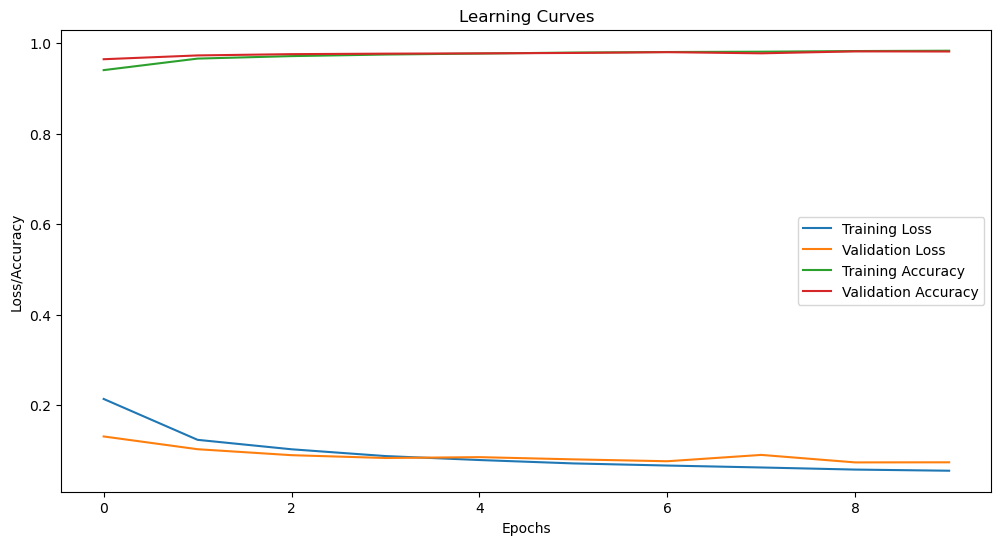

In [33]:
import matplotlib.pyplot as plt

# Plot learning curves
def learning_curves_plot(history, start_epoch=0):
    epochs = range(start_epoch, len(history.history['loss']))
    plt.figure(figsize=(12, 6))
    plt.plot(epochs, history.history['loss'][start_epoch:], label='Training Loss')
    plt.plot(epochs, history.history['val_loss'][start_epoch:], label='Validation Loss')
    plt.plot(epochs, history.history['accuracy'][start_epoch:], label='Training Accuracy')
    plt.plot(epochs, history.history['val_accuracy'][start_epoch:], label='Validation Accuracy')
    plt.title('Learning Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Loss/Accuracy')
    plt.legend()
    plt.show()

learning_curves_plot(cnn_history, start_epoch=0)

In [34]:
# Predict on the test set
y_test_pred_cnn = cnn_model.predict(X_test_new).argmax(axis=1)

# Evaluate CNN model on test data
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(X_test_new, y_test_new, verbose=0)
print(f"CNN Test Loss: {cnn_test_loss:.4f}")
print(f"CNN Test Accuracy: {cnn_test_acc:.4f}")

343/343 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
CNN Test Loss: 0.0770
CNN Test Accuracy: 0.9820


### Classification Report

In [36]:
from sklearn.metrics import classification_report

# Classification report for CNN
print("CNN Classification Report:")
print(classification_report(y_test_new, y_test_pred_cnn))

CNN Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      9059
         1.0       0.86      0.74      0.80       278
         2.0       0.97      0.93      0.95       724
         3.0       0.80      0.81      0.80        81
         4.0       0.99      0.98      0.99       804

    accuracy                           0.98     10946
   macro avg       0.92      0.89      0.91     10946
weighted avg       0.98      0.98      0.98     10946



### Confusion Matrix and Visualization

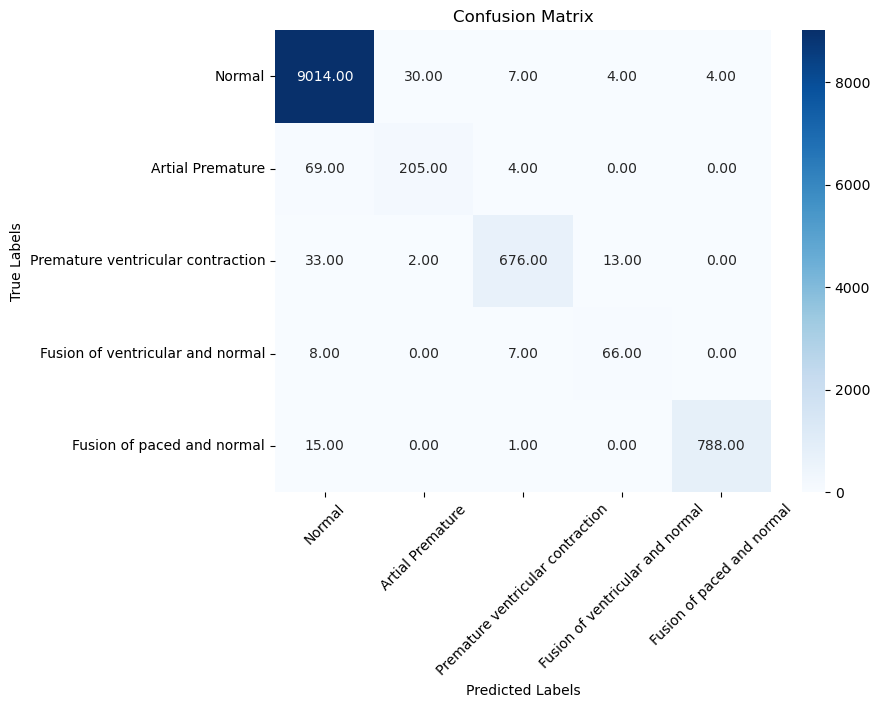

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Plot confusion matrix
def plot_confusion_matrix(conf_matrix, class_names, show_normed=True, figsize=(8, 6), colorbar=True):
    plt.figure(figsize=figsize)
    sns.heatmap(conf_matrix, annot=True, fmt=".2f" if show_normed else "d", cmap="Blues", cbar=colorbar)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.xticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names, rotation=45)
    plt.yticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names, rotation=0)
    plt.title('Confusion Matrix')
    plt.show()

class_names = [labels[i] for i in range(len(labels))]
conf_matrix_cnn = confusion_matrix(y_test_new, y_test_pred_cnn)
plot_confusion_matrix(conf_matrix_cnn, class_names=class_names, show_normed=True, figsize=(8, 6), colorbar=True)

### CNN with more epoch

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2

# Updated CNN Model
def build_updated_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Dropout(0.3),  # Increased dropout for better regularization

        Conv1D(filters=128, kernel_size=5, activation='relu'),
        MaxPooling1D(pool_size=2),
        Dropout(0.3),

        Conv1D(filters=256, kernel_size=3, activation='relu'),
        GlobalAveragePooling1D(),  # Replaces Flatten for better temporal feature aggregation

        Dense(128, activation='relu', kernel_regularizer=l2(0.01)),  # Added L2 regularization
        Dropout(0.4),  # Increased dropout

        Dense(num_classes, activation='softmax')  # Output layer for multiclass classification
    ])
    return model

# Initialize model
input_shape = (X_train_scaled.shape[1], 1)  # Ensure the correct input shape
num_classes = len(np.unique(y_train))  # Number of classes
cnn_model = build_updated_cnn_model(input_shape, num_classes)

# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Display the model summary
cnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 185, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 92, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 92, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 88, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 44, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 44, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 42, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 173,445 (677.52 KB)

 Trainable params: 173,445 (677.52 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Updated callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6, verbose=1)
model_checkpoint = ModelCheckpoint('updated_cnn_model.keras', monitor='val_loss', save_best_only=True)
callbacks = [early_stopping, reduce_lr, model_checkpoint]

# Train the updated CNN model
history = cnn_model.fit(X_train_scaled, y_train,
                        validation_data=(X_val, y_val),
                        epochs=50,  # Increased number of epochs for better convergence
                        batch_size=64,  # Adjusted batch size for stability
                        callbacks=callbacks)

Epoch 1/50
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.8317 - loss: 0.8804 - val_accuracy: 0.8858 - val_loss: 0.4215 - learning_rate: 0.0010
Epoch 2/50
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.8812 - loss: 0.4164 - val_accuracy: 0.8969 - val_loss: 0.3351 - learning_rate: 0.0010
Epoch 3/50
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.9091 - loss: 0.3403 - val_accuracy: 0.9300 - val_loss: 0.2738 - learning_rate: 0.0010
Epoch 4/50
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.9240 - loss: 0.2983 - val_accuracy: 0.9375 - val_loss: 0.2506 - learning_rate: 0.0010
Epoch 5/50
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.9327 - loss: 0.2708 - val_accuracy: 0.9389 - val_loss: 0.2295 - learning_rate: 0.0010
Epoch 6/50
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.9346 - loss: 0.2558 - val_accuracy: 0.9405 - val_loss: 0.2263 - learning_rate: 0.0010
Epoch 7/50
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accura

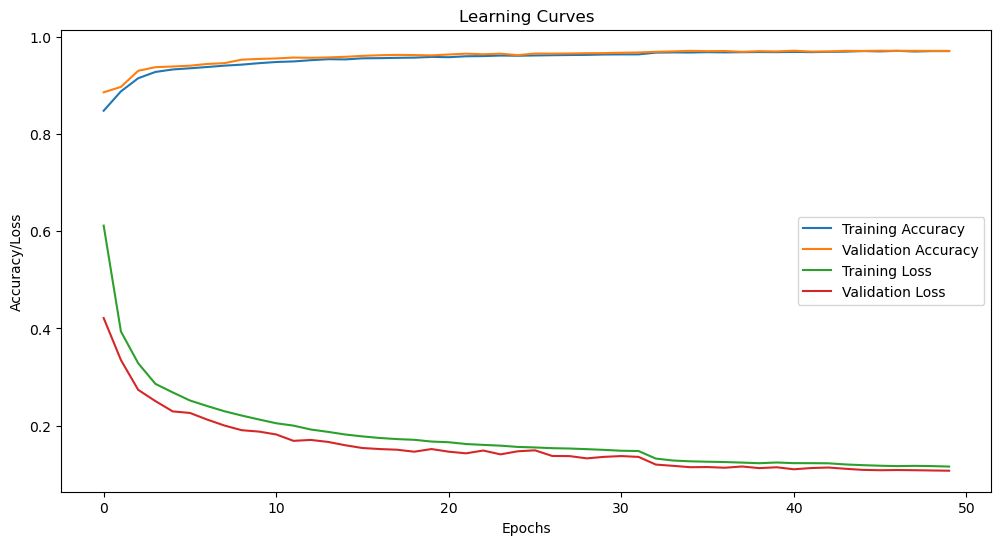

In [42]:
import matplotlib.pyplot as plt

# Function to plot learning curves
def plot_learning_curves(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy/Loss')
    plt.title('Learning Curves')
    plt.legend()
    plt.show()

# Plot the learning curves
plot_learning_curves(history)

In [43]:
# Predict on the test set
y_test_pred_cnn = cnn_model.predict(X_test_new).argmax(axis=1)

# Evaluate CNN model on the test set
test_loss, test_accuracy = cnn_model.evaluate(X_test_new, y_test_new, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

343/343 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test Loss: 0.0998
Test Accuracy: 0.9730


Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      9059
         1.0       0.79      0.57      0.66       278
         2.0       0.94      0.92      0.93       724
         3.0       0.84      0.67      0.74        81
         4.0       0.99      0.96      0.98       804

    accuracy                           0.97     10946
   macro avg       0.91      0.82      0.86     10946
weighted avg       0.97      0.97      0.97     10946



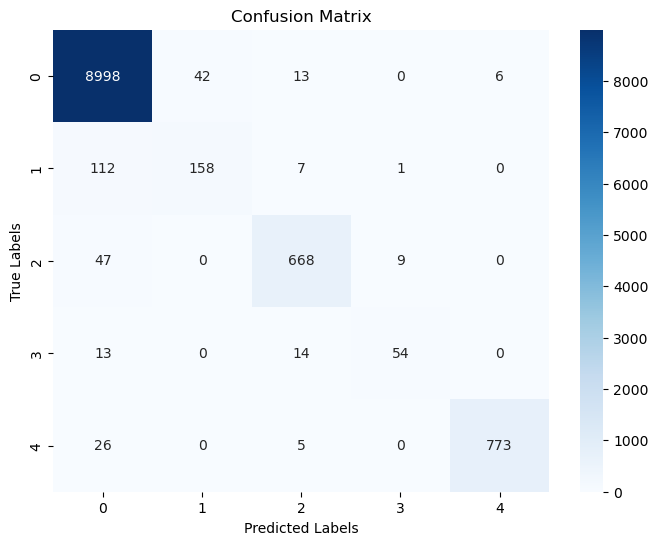

In [44]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Classification Report
print("Classification Report:")
print(classification_report(y_test_new, y_test_pred_cnn))

# Confusion Matrix
def plot_confusion_matrix(conf_matrix, class_names):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

class_names = [labels[i] for i in range(len(labels))]  # Replace `labels` with the actual class names
conf_matrix = confusion_matrix(y_test_new, y_test_pred_cnn)
plot_confusion_matrix(conf_matrix, class_names)

### RNN

In [46]:
# Define the RNN model with Attention
def build_rnn_with_attention(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    rnn_output = SimpleRNN(128, return_sequences=True, activation='tanh')(inputs)
    attention_output = Attention()([rnn_output, rnn_output])
    flatten = Flatten()(attention_output)
    dense_1 = Dense(64, activation='relu')(flatten)
    dropout = Dropout(0.5)(dense_1)
    outputs = Dense(num_classes, activation='softmax')(dropout)

    model = Model(inputs, outputs)
    return model


In [47]:
# Define model parameters
input_shape = (X_train_scaled.shape[1], X_train_scaled.shape[2])
num_classes = len(np.unique(y_train))

# Build and compile the model
model = build_rnn_with_attention(input_shape, num_classes)
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
print(model.summary())

# Train the model
history = model.fit(X_train_scaled, y_train,
                    validation_data=(X_val, y_val),
                    epochs=5, batch_size=64, verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_new, y_test_new)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Predictions and Classification Report
y_pred = np.argmax(model.predict(X_test_new), axis=-1)
print("Classification Report:")
print(classification_report(y_test_new, y_pred, digits=4))



Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 187, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ simple_rnn          │ (None, 187, 128)  │     16,640 │ input_layer_3[0]… │
│ (SimpleRNN)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention           │ (None, 187, 128)  │          0 │ simple_rnn[0][0], │
│ (Attention)         │                   │            │ simple_rnn[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 23936)     │          0 │ attention[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 64)        │  1,531,968 │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 64)        │          0 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 5)         │        325 │ dropout_9[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,548,933 (5.91 MB)

 Trainable params: 1,548,933 (5.91 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 74s 54ms/step - accuracy: 0.8462 - loss: 0.5735 - val_accuracy: 0.9307 - val_loss: 0.2362
Epoch 2/5
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 72s 53ms/step - accuracy: 0.8974 - loss: 0.7389 - val_accuracy: 0.8276 - val_loss: 0.6621
Epoch 3/5
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 73s 53ms/step - accuracy: 0.8280 - loss: 0.6829 - val_accuracy: 0.8276 - val_loss: 0.6601
Epoch 4/5
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 72s 53ms/step - accuracy: 0.8263 - loss: 0.6627 - val_accuracy: 0.8276 - val_loss: 0.6581
Epoch 5/5
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 73s 53ms/step - accuracy: 0.8266 - loss: 0.6605 - val_accuracy: 0.8276 - val_loss: 0.6578
343/343 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8255 - loss: 0.6624
Test Loss: 0.6577287912368774
Test Accuracy: 0.8276082873344421
343/343 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
Classification Report:
              precision    recall  f1-score   support

         0.0     0.8276    1.0000    0.9057      9059
         1.0     0.0000   

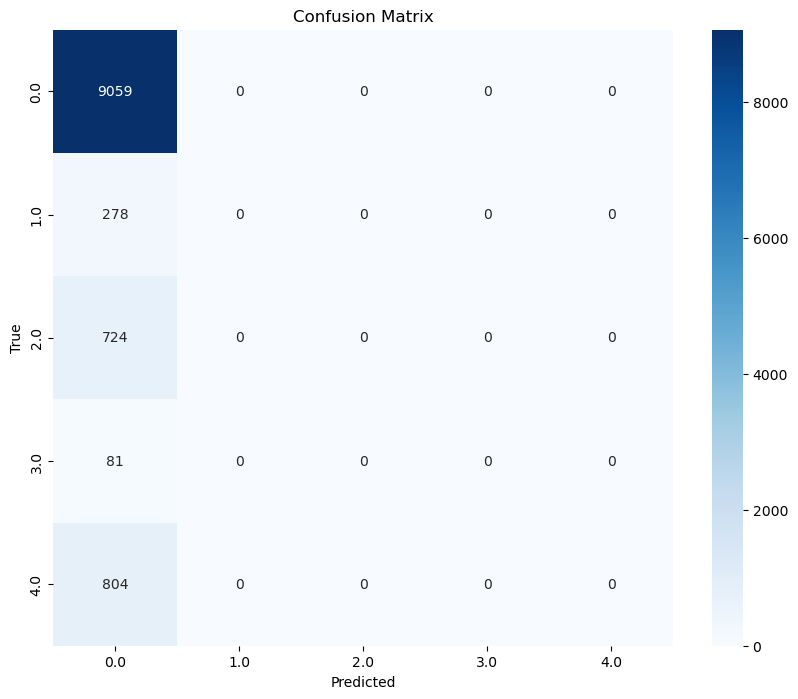

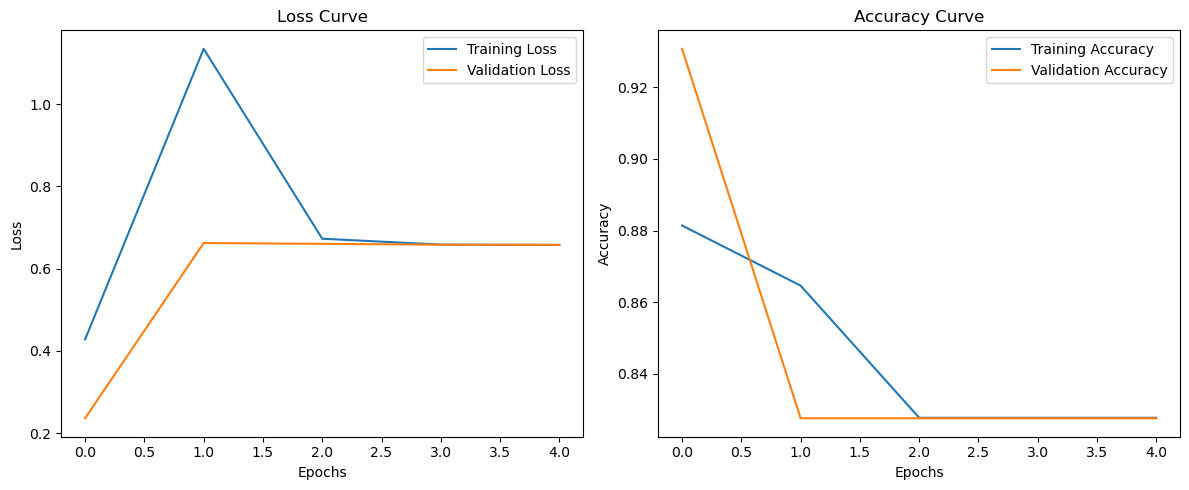

In [48]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test_new, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test_new), yticklabels=np.unique(y_test_new))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Plot learning curves
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### LSTM Model

In [50]:

# Define the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(128, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(64, return_sequences=False))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(5, activation='softmax'))  # For binary classification


# Compile the model
model_lstm.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              verbose=1,
                              patience=2,
                              min_lr=1e-6)
model_checkpoint = ModelCheckpoint('lstm_model.keras', monitor='val_loss', save_best_only=True)



In [51]:
# Train the model
history = model_lstm.fit(
    X_train_scaled,
    y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    callbacks= [reduce_lr, model_checkpoint]
)

Epoch 1/20
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 257s 94ms/step - accuracy: 0.8265 - loss: 0.6844 - val_accuracy: 0.8276 - val_loss: 0.5603 - learning_rate: 0.0010
Epoch 2/20
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 239s 87ms/step - accuracy: 0.8338 - loss: 0.5396 - val_accuracy: 0.8894 - val_loss: 0.3783 - learning_rate: 0.0010
Epoch 3/20
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 242s 89ms/step - accuracy: 0.9106 - loss: 0.3382 - val_accuracy: 0.9207 - val_loss: 0.2761 - learning_rate: 0.0010
Epoch 4/20
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 241s 88ms/step - accuracy: 0.9264 - loss: 0.2645 - val_accuracy: 0.9382 - val_loss: 0.2201 - learning_rate: 0.0010
Epoch 5/20
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 243s 89ms/step - accuracy: 0.9392 - loss: 0.2176 - val_accuracy: 0.9502 - val_loss: 0.1789 - learning_rate: 0.0010
Epoch 6/20
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 241s 88ms/step - accuracy: 0.9511 - loss: 0.1759 - val_accuracy: 0.9503 - val_loss: 0.1857 - learning_rate: 0.0010
Epoch 7/20
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 237s 87ms/step -

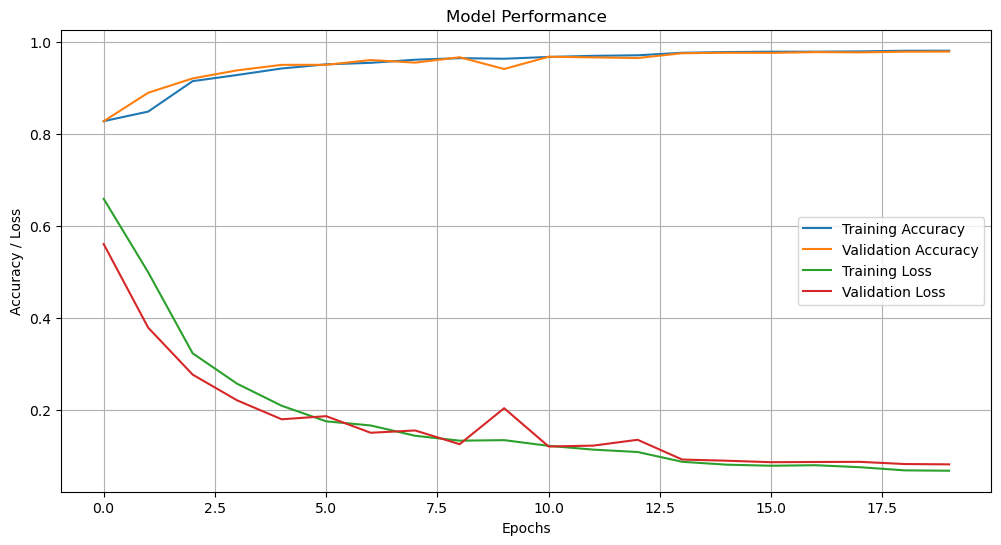

In [52]:
# Plot learning curves
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Performance')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.grid()
plt.show()

In [53]:
# Evaluate the model on the test set
test_loss, test_accuracy = model_lstm.evaluate(X_test_new, y_test_new, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Model summary
model_lstm.summary()

# Predictions predict(X_test_new).argmax(axis=1)
y_pred_lstm = model_lstm.predict(X_test_new).argmax(axis=1)

# Classification report
print("Classification Report:")
print(classification_report(y_test_new, y_pred_lstm))


Test Loss: 0.0747
Test Accuracy: 0.9820


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 187, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 187, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 348,881 (1.33 MB)

 Trainable params: 116,293 (454.27 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 232,588 (908.55 KB)

343/343 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      9059
         1.0       0.90      0.66      0.76       278
         2.0       0.96      0.95      0.95       724
         3.0       0.88      0.72      0.79        81
         4.0       1.00      0.98      0.99       804

    accuracy                           0.98     10946
   macro avg       0.94      0.86      0.90     10946
weighted avg       0.98      0.98      0.98     10946



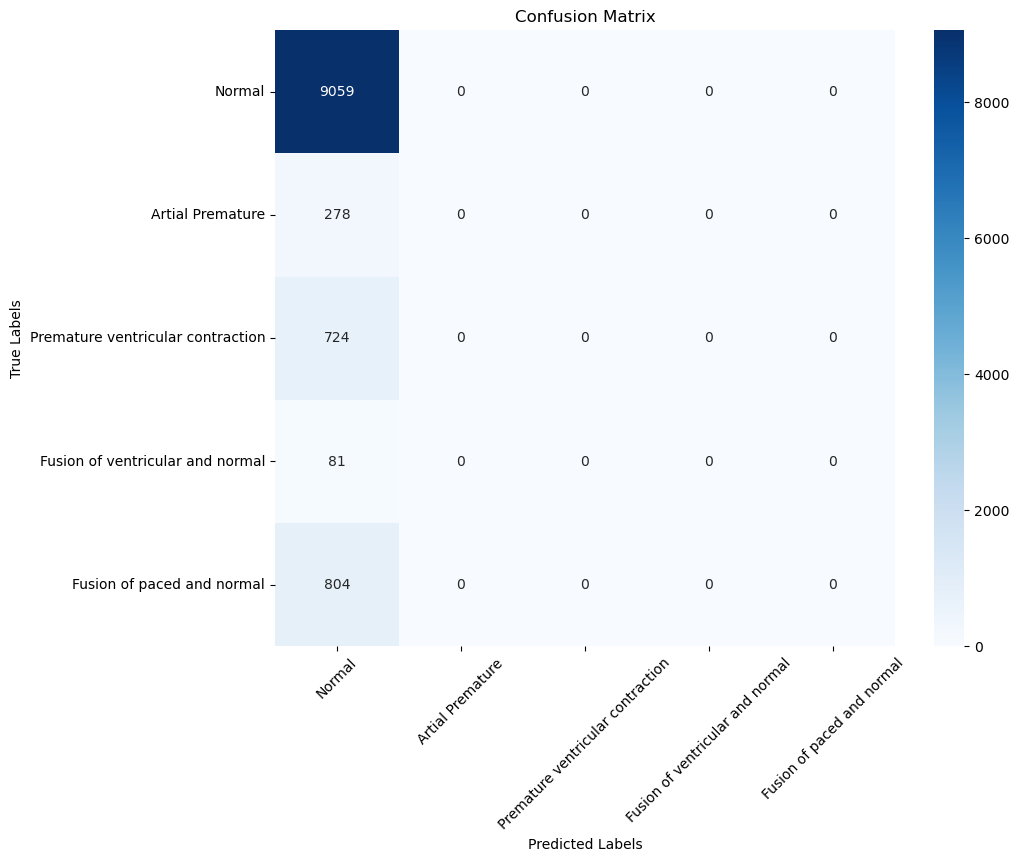

Classification Report:
                                   precision    recall  f1-score   support

                           Normal       0.83      1.00      0.91      9059
                 Artial Premature       0.00      0.00      0.00       278
Premature ventricular contraction       0.00      0.00      0.00       724
 Fusion of ventricular and normal       0.00      0.00      0.00        81
       Fusion of paced and normal       0.00      0.00      0.00       804

                         accuracy                           0.83     10946
                        macro avg       0.17      0.20      0.18     10946
                     weighted avg       0.68      0.83      0.75     10946



In [54]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_new, y_pred)

# Define a function to plot the confusion matrix
def plot_confusion_matrix(conf_matrix, class_names, figsize=(10, 8), colorbar=True):
    plt.figure(figsize=figsize)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", cbar=colorbar)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.xticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names, rotation=45)
    plt.yticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names, rotation=0)
    plt.show()

# Map class indices to their respective labels
class_names = [labels[i] for i in range(len(labels))]

# Plot the confusion matrix
plot_confusion_matrix(conf_matrix, class_names)

# Print classification report
print("Classification Report:")
print(classification_report(y_test_new, y_pred, target_names=class_names))

### GRU

In [56]:
def create_gru(input_shape, num_classes):
    model = Sequential([
        GRU(64, return_sequences=True, input_shape=input_shape, activation='relu'),
        Dropout(0.3),
        GRU(128, activation='relu'),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Model Initialization
input_shape = X_train_scaled.shape[1:]
num_classes = len(np.unique(y_train))

model_gru = create_gru(input_shape, num_classes)
model_gru.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Model Summary
model_gru.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 187, 64)        │        12,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 187, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 128)            │        74,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,517 (408.27 KB)

 Trainable params: 104,517 (408.27 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Define Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=1, min_lr=1e-6)
model_checkpoint = ModelCheckpoint('gru_model.keras', monitor='val_loss', save_best_only=True)

callbacks = [early_stopping, reduce_lr, model_checkpoint]

# Training the Model
gru_history = model_gru.fit(X_train_scaled, y_train,
                            validation_data=(X_val, y_val),
                            epochs=20,
                            batch_size=32,
                            callbacks=callbacks)

Epoch 1/20
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 251s 91ms/step - accuracy: 0.8276 - loss: 0.6994 - val_accuracy: 0.8276 - val_loss: 0.6420 - learning_rate: 0.0010
Epoch 2/20
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 238s 87ms/step - accuracy: 0.8289 - loss: 0.6443 - val_accuracy: 0.8288 - val_loss: 0.6474 - learning_rate: 0.0010
Epoch 3/20
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 240s 88ms/step - accuracy: 0.8267 - loss: 0.6493 - val_accuracy: 0.8291 - val_loss: 0.6400 - learning_rate: 0.0010
Epoch 4/20
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 240s 88ms/step - accuracy: 0.8311 - loss: 0.6152 - val_accuracy: 0.9065 - val_loss: 0.3770 - learning_rate: 0.0010
Epoch 5/20
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 239s 87ms/step - accuracy: 0.9155 - loss: 0.3344 - val_accuracy: 0.9313 - val_loss: 0.2308 - learning_rate: 0.0010
Epoch 6/20
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 236s 86ms/step - accuracy: 0.9367 - loss: 0.2288 - val_accuracy: 0.9479 - val_loss: 0.1996 - learning_rate: 0.0010
Epoch 7/20
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 289s 106ms/step 

In [ ]:
def plot_learning_curves(history):
    plt.style.use('fivethirtyeight')

    # Accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='green')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

plot_learning_curves(gru_history)


In [ ]:
# Evaluate on Test Set
test_loss, test_accuracy = model_gru.evaluate(X_test_new, y_test_new)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Predict on Test Set
y_pred_gru = model_gru.predict(X_test_new)
y_pred_classes_gru = np.argmax(y_pred_gru, axis=1)


In [ ]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test_new, y_pred_classes_gru, target_names=list(labels.values())))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_new, y_pred_classes_gru)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(labels.values()), yticklabels=list(labels.values()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
